# 如何用Paython制作自己的图片数据集

## 【目录】
- [1.准备或者爬取自己的图片](#1.-准备或者爬取自己的图片)
- [2.处理图片](#2.-处理图片)
- [3.保存到文件](#3.-保存到文件)

**本文所使用的图片处理工具为 OpenCV, 当然你也可以用PIL**
- OpenCV ([OpenCV-Python中文教程](https://www.kancloud.cn/aollo/aolloopencv/259610))
```bash
pip install opencv-python
```

【参考】

- Fashion MNIST paper 地址：https://arxiv.org/abs/1708.07747 
- Fashion MINST 数据集下载地址: https://github.com/zalandoresearch/fashion-mnist 
- https://blog.csdn.net/xundh/article/details/75453695
- https://github.com/JustinhoCHN/keras-image-data-augmentation
- 如何制作cifar10数据集  https://github.com/yhlleo/cifar10Dataset
- TensorFlow制作数据集 https://mrlittlepig.github.io/2017/04/30/tensorflow-for-image-processing/   
- TensorFlow制作数据集 https://blog.csdn.net/u012986684/article/details/77418243 
- 用PIL来处理图片可以参考: http://www.voidcn.com/article/p-ckzoyajj-wx.html

# 1. 准备或者爬取自己的图片

这个就不说了，百度，JD, TaoBao上多的是！

# 2. 处理图片

1. 读取文件夹中的png图片    
2. 将图片转换成"灰度"图片
3. 将图片resize成  28 x 28的图片
4. 将所有的图片保存到文件

**如何裁剪图片**
![](https://img-blog.csdn.net/20170904103250789?watermark/2/text/aHR0cDovL2Jsb2cuY3Nkbi5uZXQvdTAxMTk5NTcxOQ==/font/5a6L5L2T/fontsize/400/fill/I0JBQkFCMA==/dissolve/70/gravity/SouthEast)


1. JPEG –> PNG
2. 裁剪背景
3. 按比例： max(h,w)/28 将图像缩放，也就是将一个维度缩放至28
4. 锐化
5. 再扩充至28*28，再把object调整至图片中央
6. 将负的像素点剔除
7. 转化成28*28的灰度图

In [212]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 原图如下：

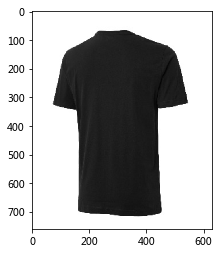

In [213]:
origin_img = cv.imread('../data/my-dataset-images/T-Shirt/T-Shirt-01.png')
plt.imshow(origin_img)
plt.show()

In [243]:
import os

# 按比例裁剪
# max(h, w) -> 28, p = max(h,w)/28
# 如: 760(height) x 630(wight) 的图片
# 则先将 max(h,w) = 760 (height)resized到 28， 并算出 760/28 = 27
# 再将 width = 630/27 = 23
# 所以 resize(27, 23)的图片

def resize(img):
    ## 将图片灰度化
    img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
    h = img.shape[0]
    w = img.shape[1]
    p = max(h,w)/28
    if h > w:
        resize_h = 28
        resize_w = w/p
    else:
        resize_w = 28
        resize_h = h/p
    
    img_resized = cv.resize(img, (resize_h, resize_w), interpolation = cv.INTER_AREA)
    
    # 灰度处理
    img_resized = cv.resize(img, (28, 28), interpolation = cv.INTER_AREA)
    #img_resized = (img_resized/255).astype(np.float32)
    return img_resized

def load_data(path):
    imgs_bytes = []
    idx = 0
    total_imgs = len([img_name for img_name in os.listdir(path) if img_name.endswith('.png')])
    data = np.zeros((total_imgs,28,28), dtype=np.uint8)
    for img_name in os.listdir(path):
        if not img_name.endswith('.png'):
            continue
            
        img_path = os.path.join(path, img_name)
        img = cv.imread(img_path)
        resized_img = resize(img)
        data[idx,:]=resized_img
        idx+=1
        
    return  data 

In [241]:
data = load_data('../data/my-dataset-images/T-Shirt/')
print data.shape

(10, 28, 28)


**注意**在验证时(将数据 predict时)需要将数据二值化,不然会影响测试结果
```python
data = data / data.max()
data = data.reshape(-1, 28,28,1).astype('float32')
```

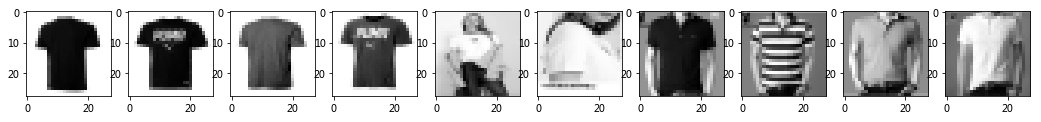

In [242]:
n = data.shape[0]

plt.figure(figsize=(18,10))
for i in range(n):
    plt.subplot(1,n,i+1)
    plt.imshow(data[i], cmap='gray')

plt.show()

# 3. 保存到文件

In [232]:
import cPickle
with open('../data/my-dataset-images/My_Fashion_MNIST', 'w') as f:
    cPickle.dump(data, f)

然后在用的时候，可以直接使用 `np.load(filename)` 来加载数据！